<a href="https://colab.research.google.com/github/shailendrarg/Deep-learning/blob/master/Stock_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM model for stock price prediction

Stock prices prediction of Newyork stocks market from 2010 to 2016 and the Goal is to predict the High price of a perticular stock.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#prices=pd.read_csv("../input/prices.csv")
prices=pd.read_csv("/content/drive/My Drive/Machine Learning/Stock prices/prices.csv")
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [47]:
prices.shape

(851264, 7)

In [48]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [0]:
companies=prices.groupby("symbol")

In [50]:
companies["symbol"].value_counts()

symbol  symbol
A       A         1762
AAL     AAL       1762
AAP     AAP       1762
AAPL    AAPL      1762
ABBV    ABBV      1008
                  ... 
YHOO    YHOO      1762
YUM     YUM       1762
ZBH     ZBH       1762
ZION    ZION      1762
ZTS     ZTS        987
Name: symbol, Length: 501, dtype: int64

In [0]:
VZ_df=companies.get_group("VZ")
wyn_df=companies.get_group("WYN")

In [52]:
VZ_df.head()

,date,symbol,open,close,low,high,volume
691,2010-01-04,VZ,33.399868,33.279869,33.089868,33.449868,16176600.0
1159,2010-01-05,VZ,33.369868,33.339868,32.779871,33.399868,23722900.0
1627,2010-01-06,VZ,32.639872,31.919873,31.799875,32.739871,37506400.0
2095,2010-01-07,VZ,32.099874,31.729875,31.529875,32.099874,25508200.0
2563,2010-01-08,VZ,31.659875,31.749874,31.419875,31.779874,20658300.0


In [53]:
VZ_df.high.skew()

-0.6227541269486909

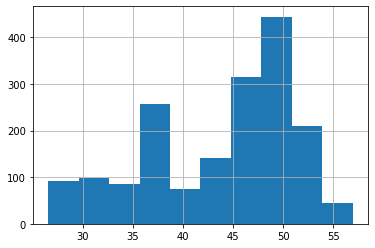

In [54]:
VZ_df["high"].hist()

In [0]:
training_data=VZ_df["high"]
#training_data=VZ_df["high"].sample(1760)
#testing_data=VZ_df["high"].sample(2)

In [56]:
training_data.shape

(1762,)

In [57]:
training_data.values
training_data=training_data.values.reshape(-1, 1)
training_data.shape

(1762, 1)

In [0]:
# testing_data=testing_data.values.reshape(-1,1)
# testing_data.shape

In [0]:
# from sklearn.preprocessing import StandardScaler
# mm=StandardScaler()
# mm.fit_transform(testing_data)

In [60]:
#the sequenced data needs to be SCALED
from sklearn.preprocessing import StandardScaler
mm=StandardScaler()
mm.fit_transform(training_data)


array([[-1.40004525],
       [-1.40677971],
       [-1.49567423],
       ...,
       [ 1.34494037],
       [ 1.35436862],
       [ 1.319349  ]])

In [61]:
len(training_data)

1762

In [0]:
#cerating data in a sequence of interval of 30
#X will be from 0 to 59 , y will be 60
X=[]
y=[]

for i in range(60,len(training_data)):
    X.append(training_data[i-60:i,0])
    y.append(training_data[i,0])
    
#testing data

# X_test=[]
# y_test=[]

# for i in range(60,len(testing_data)):
#     X_test.append(testing_data[i-60:i,0])
#     y_test.append(testing_data[i,0])

In [64]:
X[0].shape

(60,)

In [0]:
#convertingthe data in numpy arrays  for neural network
X_data= np.array(X)
y_data=np.array(y)
#testing

# X_test_data= np.array(X_test)
# y_test_data=np.array(y_test)

In [0]:
# X_test[0].shape

In [68]:
X_data.shape #features

(1702, 60)

In [0]:
# X_test_data.shape

In [70]:
#reshape the feature for neral network
X_train=X_data.reshape(X_data.shape[0],X_data.shape[1],1)
X_train.shape

(1702, 60, 1)

In [0]:
# X_lstest=X_test_data.reshape(X_test_data.shape[0],X_test_data.shape[1],1)
# X_lstest.shape

In [72]:
y_train=y_data
y_train.shape

(1702,)

In [0]:
# y_lstest=y_test_data
# y_lstest.shape

In [80]:
#LSTM code
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import rmsprop,SGD
from keras.losses import mean_squared_error
from keras.callbacks import EarlyStopping
mse=mean_squared_error
#opt=rmsprop(lr=0.001)#small learning rate 
#opt=Adagrad(lr=0.001,momentum= 0.3)#small learning rate 
model=Sequential()
#input #input_shape=(batch_size,time_steps,features) so it will be  191,60,1
model.add(LSTM(units=100,activation="relu",input_shape =(X_train.shape[1],1),return_sequences=True))
model.add(Dropout(0.2))
#hidden
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss="mse",optimizer="rmsprop")
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            30200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)               

In [0]:
#uxsing callbacks as earlystopping to stop the training process if model is not learning 
es = EarlyStopping(monitor='val_loss')

In [81]:
history=model.fit(X_train,y_train,epochs=100,batch_size=60,validation_split=0.33)
#history=model.fit(X_train,y_train,epochs=100,batch_size=60,validation_split=0.33,callbacks=[es])

Train on 1140 samples, validate on 562 samples
Epoch 1/100
1140/1140 [==============================] - 14s 12ms/step - loss: 1357.9808 - val_loss: 1569.6043
Epoch 2/100
1140/1140 [==============================] - 10s 9ms/step - loss: 1002.1707 - val_loss: 1449.7246
Epoch 3/100
1140/1140 [==============================] - 10s 9ms/step - loss: 932.9111 - val_loss: 1377.4362
Epoch 4/100
1140/1140 [==============================] - 10s 9ms/step - loss: 877.9198 - val_loss: 1307.7272
Epoch 5/100
1140/1140 [==============================] - 10s 9ms/step - loss: 822.5424 - val_loss: 1240.1059
Epoch 6/100
1140/1140 [==============================] - 10s 9ms/step - loss: 768.3678 - val_loss: 1174.0093
Epoch 7/100
1140/1140 [==============================] - 10s 9ms/step - loss: 721.7923 - val_loss: 1110.2325
Epoch 8/100
1140/1140 [==============================] - 10s 9ms/step - loss: 675.1566 - val_loss: 1048.3107
Epoch 9/100
1140/1140 [==============================] - 10s 9ms/step - loss: 

Model stopped learning after 40 epochs

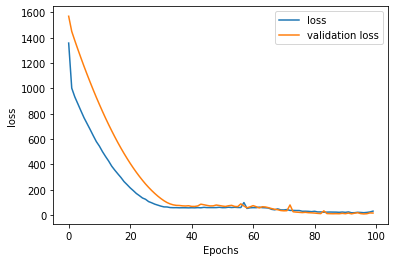

In [84]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss","validation loss"])
plt.show()

In [0]:
#model.predict([X_lstest])

In [0]:
#y_lstest